In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, loadData, loadBeh, getBeh
from analysis import dffCalc, filtData, smoothData
from events import getEvents
from trials import markTrials
from bouts import getBouts, getBoutDur, getBouts_
from statistics import stdCalc, getBoutMeans, getBoutMeans_, baselineBouts, getStats
from plotter import plotMean, plotHeat, plotTrials

In [2]:
# Start gathering the data from FR1 exp
# Mice
mice = [(8404,6), (8857, 3), (8864, 1)]
# Parameters
behType = 'FR1'
fs = 0.05
trials=[1,12]

# Get file paths
fileList = loopMice(mice, behType)

# Load the data
dataList = loadData(mice, behType)

# Load the behaviour
eventList = getBeh(mice, fileList['Behaviour'], behType)

# FIlter and dFF
filtList = filtData(mice, dffCalc(mice, dataList, lowest=False), cutoff=3.0, order=6)
dFFList = smoothData(mice, filtList, window=5)

In [3]:
fpath="J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\8404_FR1_Behaviour\\8404_Tracking_Data.xlsx"
tracks = pd.read_excel(fpath, header= 0, skiprows= 33, convert_float= True, na_values= '-')
tracks = tracks.drop(0).reset_index()

In [ ]:
tracks

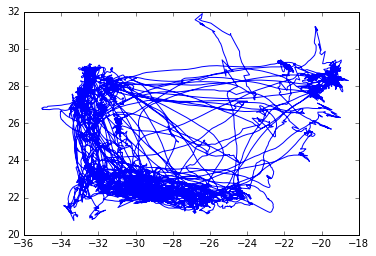

In [15]:
plt.plot(tracks['X center'], tracks['Y center'])

In [48]:
len(tracks['Trial time'])/25*20,  len(tracks['Trial time']), tracks['Trial time'].loc[tracks['Trial time'].index[-1]]

(29560, 36960, 1479.4)

(36960, 36957)

In [28]:
from sklearn.preprocessing import Imputer

# Complete the missing values
x = tracks['Velocity']
imp=Imputer(missing_values='NaN', strategy='mean', axis=1)
imp.fit([x])
velImp = imp.transform([x])[0]

In [49]:
import scipy.signal as sig

# Resample the vel data
[velRes, t] = sig.resample(velImp, 36960, tracks['Trial time'])

(-10, 40)

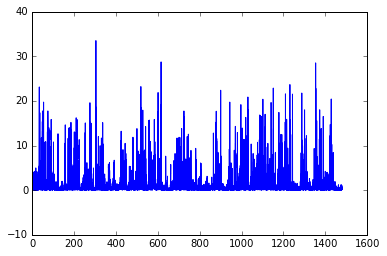

In [50]:
plt.plot(t,velRes)
plt.ylim([-10, 40])

(-10, 40)

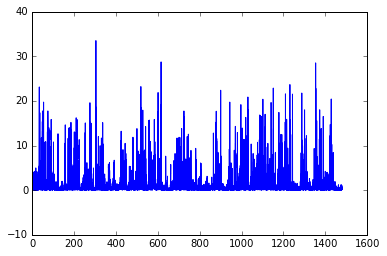

In [33]:
plt.plot(tracks['Trial time'], velImp)
plt.ylim([-10, 40])

(-10, 40)

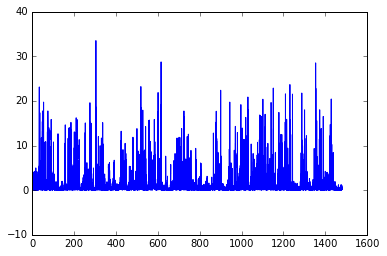

In [34]:
plt.plot(tracks['Trial time'], tracks['Velocity'])
plt.ylim([-10, 40])

In [51]:
eventStart = getEvents(mice, eventList, 'Eat_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials)

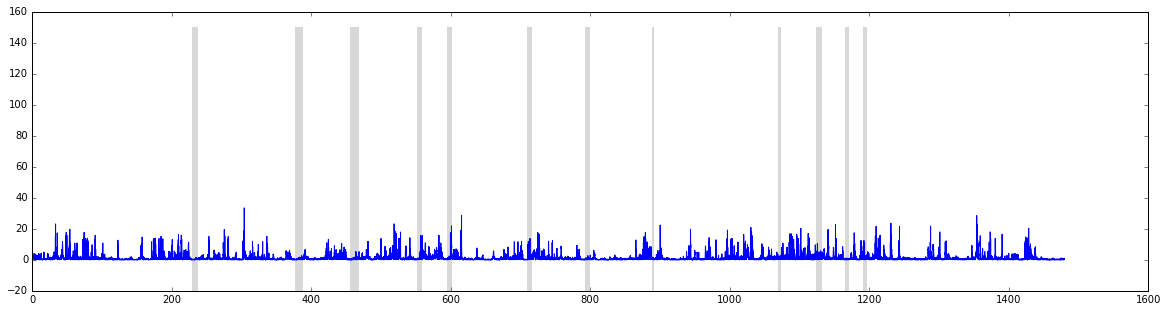

In [53]:
fig = plt.figure(figsize= (20,5))
ax = plt.subplot(111)
# Plot the velocity profile
ax.plot(tracks['Trial time'], tracks['Velocity'])
# Plot the eating bouts
for i, event in enumerate(eventStart[8404]):
    ax.fill_between([eventStart[8404].loc[i+1], eventEnd[8404].loc[i+1]], -20, 150, facecolor='gray', linewidth=0, alpha=0.3, zorder=-55)
#ax.set_ylim([0, 60])
#ax.set_xlim([500, 600])

(1400, 1500)

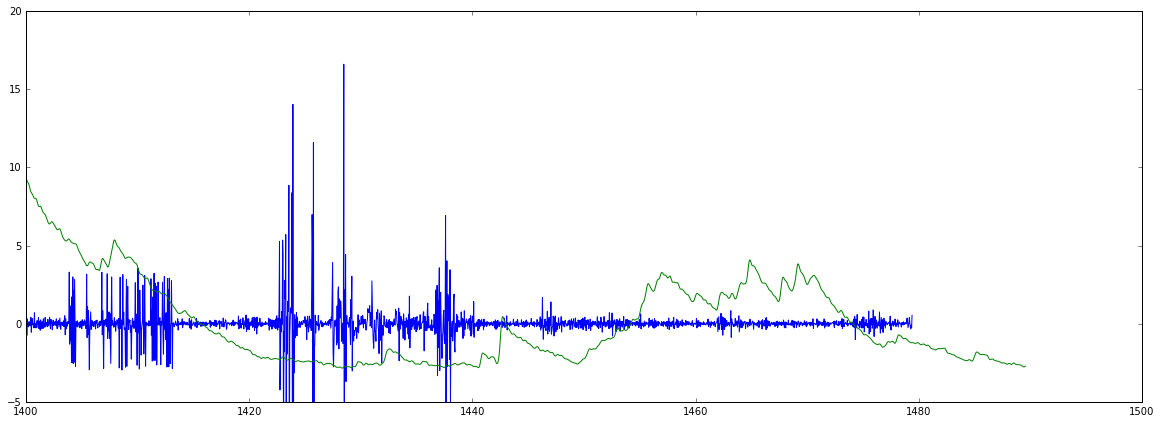

In [119]:
fig = plt.figure(figsize= (20,7))
ax = plt.subplot(111)
ax.plot(tracks['Trial time'], tracks['Velocity'].diff())

cell = 3
plt.plot(dFFList[8404].index, dFFList[8404][dFFList[8404].columns[cell]])

# Plot the eating bouts
for i, event in enumerate(eventStart[8404]):
    ax.fill_between([eventStart[8404].loc[i+1], eventEnd[8404].loc[i+1]], -20, 150, facecolor='gray', linewidth=0, alpha=0.3, zorder=-55)

    
ax.set_ylim([-5, 20])
event = 7
ax.set_xlim([1400, 1500])
#ax.set_xlim([eventStart[8404].loc[event]-20, eventStart[8404].loc[event]+30])

(200, 300)

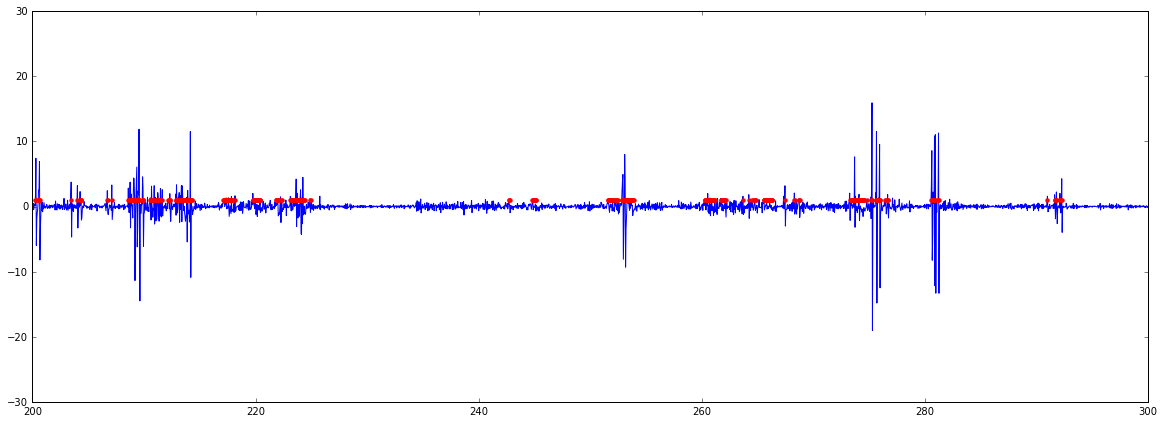

In [148]:
fig = plt.figure(figsize= (20,7))
ax = plt.subplot(111)
ax.plot(tracks['Trial time'], tracks['Velocity'].diff())

acc = tracks['Trial time'][tracks['Velocity'].diff() > 2.]
acc = tracks['Trial time'][tracks['Velocity'] > 2.]
ax.scatter(acc, np.ones(len(acc)), c='r', linewidths=0, zorder=11)

ax.set_xlim(200,300)

In [136]:
acc

6           1.28
9            1.4
12          1.52
37          2.52
48          2.96
57          3.32
86          4.48
93          4.76
96          4.88
134          6.4
143         6.76
146         6.88
148         6.96
153         7.16
156         7.28
159          7.4
167         7.72
171         7.88
175         8.04
189          8.6
202         9.12
206         9.28
220         9.84
268        11.76
287        12.52
297        12.92
300        13.04
381        16.28
387        16.52
389         16.6
          ...   
35676    1428.08
35679     1428.2
35680    1428.24
35686    1428.48
35688    1428.56
35690    1428.64
35702    1429.12
35704     1429.2
35744     1430.8
35749       1431
35750    1431.04
35833    1434.36
35874       1436
35892    1436.72
35895    1436.84
35897    1436.92
35899       1437
35900    1437.04
35902    1437.12
35903    1437.16
35914     1437.6
35917    1437.72
35919     1437.8
35920    1437.84
35924       1438
35932    1438.32
35933    1438.36
35977    1440.